<a href="https://colab.research.google.com/github/b04201025/math.ai.hw/blob/master/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

from keras.datasets import mnist


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

model.add(Dense(256, input_dim=784,
                kernel_initializer='normal',
                bias_initializer='zeros'))
model.add(Activation('relu'))



model.add(Dense(10,
                kernel_initializer='normal',
                bias_initializer='zeros'))
model.add( Activation('softmax'))

In [61]:
from keras import optimizers

# 所有参数梯度将被裁剪，让其l2范数最大为1：g * 1 / max(1, l2_norm)
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train_norm, y_train, epochs=10, batch_size=800)

train_history = model.fit(x=x_train_norm, y=y_train, epochs=10, batch_size=800)  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.6813 - acc: 0.8313
Epoch 2/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.2710 - acc: 0.9248
Epoch 3/10
60000/60000 [==============================] - 1s 9us/step

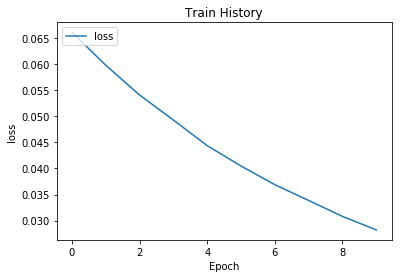

In [62]:
plt.plot(train_history.history['loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [63]:
from ipywidgets import interact_manual


def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predictions[num])
    
interact_manual(test, num =(0,9999))
score = model.evaluate(x_test,y_test)

print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])


interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

10000/10000 [==============================] - 1s 62us/step
測試資料的 loss: 0.3316285855669259
測試資料正確率: 0.9791
